In [181]:
# import libraries !

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn


In [182]:
# import online dataset !
from sklearn.datasets import load_digits

digits = load_digits()


In [183]:
digits.data.shape


(1797, 64)

In [184]:
digits.target.shape

(1797,)

In [185]:
# input / independent !
X = digits.data
X


array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [186]:
# output / dependent !
y = digits.target
y


array([0, 1, 2, ..., 8, 9, 8])

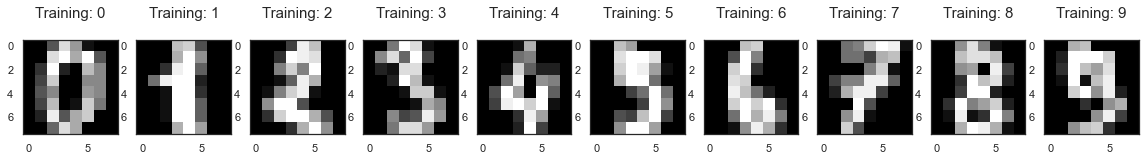

In [187]:
plt.figure(figsize=(20,4))
sns.set_theme(style="white", color_codes=True)

for index, (image, label) in enumerate(zip(digits.data[0:10], digits.target[0:10])):
    plt.subplot(1, 10, index+1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title("Training: %i\n" % label, fontsize= 15)

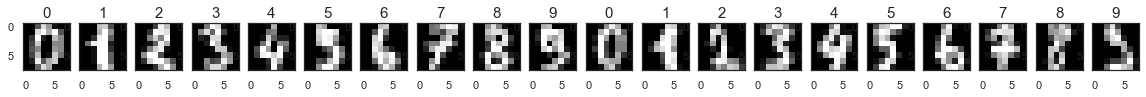

In [188]:
plt.figure(figsize=(20,4))
sns.set_theme(style="white", color_codes=True)

for index, (image, label) in enumerate(zip(digits.data[0:20], digits.target[0:20])):
    plt.subplot(1, 20, index+1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title(label, fontsize= 15)

In [189]:
# help(plt)

In [190]:
# split data !
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [191]:
print("Train input data: ", X_train.shape)
print("Test input data: ", X_test.shape)

print("Train output data: ", y_train.shape)
print("Test output data: ", y_test.shape)

Train input data:  (1437, 64)
Test input data:  (360, 64)
Train output data:  (1437,)
Test output data:  (360,)


In [192]:
 # model train !
from sklearn.linear_model import LogisticRegression

# create and fit model !
model = LogisticRegression().fit(X_train, y_train)
model

C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [193]:
model.predict(X_test[0:6])

array([2, 8, 2, 6, 6, 7])

In [194]:
pred_values = model.predict(X_test)
pred_values

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5, 2, 8, 6, 6, 6, 6, 1, 0, 5, 8, 8, 7,
       8, 4, 7, 5, 4, 9, 2, 9, 4, 7, 6, 8, 9, 4, 3, 1, 0, 1, 8, 6, 7, 7,
       1, 0, 7, 6, 2, 1, 9, 6, 7, 9, 0, 0, 9, 1, 6, 3, 0, 2, 3, 4, 1, 9,
       2, 6, 9, 1, 8, 3, 5, 1, 2, 8, 2, 2, 9, 7, 2, 3, 6, 0, 9, 3, 7, 5,
       1, 2, 9, 9, 3, 1, 4, 7, 4, 8, 5, 8, 5, 5, 2, 5, 9, 0, 7, 1, 4, 7,
       3, 4, 8, 9, 7, 9, 8, 2, 1, 5, 2, 5, 8, 4, 1, 7, 0, 6, 1, 5, 5, 9,
       9, 5, 9, 9, 5, 7, 5, 6, 2, 8, 6, 9, 6, 1, 5, 1, 5, 9, 9, 1, 5, 3,
       6, 1, 8, 9, 8, 7, 6, 7, 6, 5, 6, 0, 8, 8, 9, 8, 6, 1, 0, 4, 1, 6,
       3, 8, 6, 7, 4, 9, 6, 3, 0, 3, 3, 3, 0, 7, 7, 5, 7, 8, 0, 7, 1, 9,
       6, 4, 5, 0, 1, 4, 6, 4, 3, 3, 0, 9, 5, 9, 2, 1, 4, 2, 1, 6, 8, 9,
       2, 4, 9, 3, 7, 6, 2, 3, 3, 1, 6, 9, 3, 6, 3, 3, 2, 0, 7, 6, 1, 1,
       9, 7, 2, 7, 8, 5, 5, 7, 5, 2, 3, 7, 2, 7, 5, 5, 7, 0, 9, 1, 6, 5,
       9, 7, 4, 3, 8, 0, 3, 6, 4, 6, 3, 2, 6, 8, 8, 8, 4, 6, 7, 5, 2, 4,
       5, 3, 2, 4, 6, 9, 4, 5, 4, 3, 4, 6, 2, 9, 0,

In [195]:
# make confution metrics !
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, pred_values)
cm

array([[27,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 34,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0, 35,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 29,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 29,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 37,  0,  0,  0,  3],
       [ 0,  1,  0,  0,  0,  0, 43,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 38,  0,  0],
       [ 0,  2,  1,  0,  0,  0,  0,  0, 36,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0, 40]], dtype=int64)

In [196]:
score = model.score(X_test, y_test)*100
print("Score:", score)

Score: 96.66666666666667


***

***

Text(0.5, 1.0, 'Accuracy Score: 96.66666666666667')

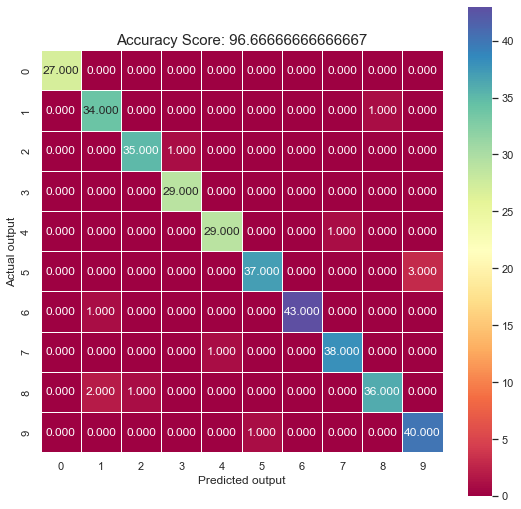

In [197]:
plt.figure(figsize=(9,9))

sns.heatmap(cm, annot= True, fmt= '.3f', linewidths= .5, square= True, cmap= 'Spectral')

plt.xlabel("Predicted output")
plt.ylabel("Actual output")

all_sample_title= "Accuracy Score: {0}".format(score)

plt.title(all_sample_title, size= '15')
